# Simple Linear Regression - Salary Data

The *salaries.csv* dataset is used for this exercise.


## Import relevant packages and read the data ##

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# stats models and machine learning test
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('../datasets/salaries.csv') # automatically puts data into df


## Explore the data ##


In [26]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [27]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [29]:
df.shape

(30, 2)

In [30]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Plot a Scatter graph ##

9449.962321455076
25792.20019866869


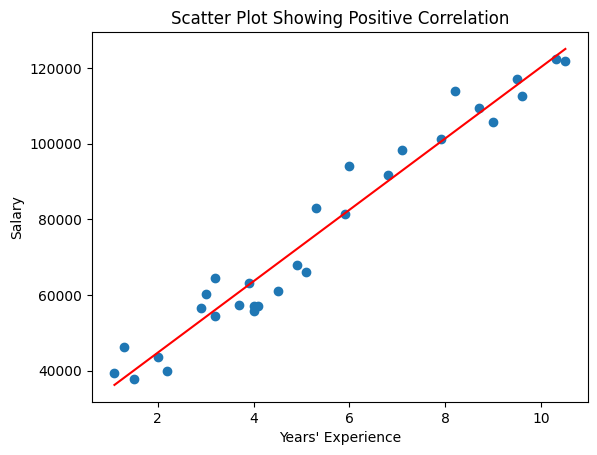

In [35]:
x = df['YearsExperience']
y = df['Salary']

# Plot a scatter graph
plt.scatter(x, y)

# Graph title & labels
plt.title('Scatter Plot Showing Positive Correlation')
plt.xlabel('Years\' Experience')
plt.ylabel('Salary')

# Compute the line of best fit
m, c = np.polyfit(x, y, 1) # degree of 1

print(m)
print(c)

# m = slope / gradient (step) - arithmatic mean
# c = intercept on the y-axis / constant

# Plot the line of best fit
plt.plot(x, m*x + c, color='red')

# Show the plot
plt.show()

## Split the DataFrame into train and test data ##

In [36]:
train, test = train_test_split(
    df,
    random_state = 13 # this ensures that we get the same answer each time
)


 ## Train the model



In [11]:
# Identify dependent and independent variables

dependent_var = train['Salary']
independent_var = train['YearsExperience']
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

## Interpret the model results


In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        10:48:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predict data in the test set ##



In [38]:
predicted = model.predict(
    sm.add_constant(test['YearsExperience'])

)

## Is the model also 'a good fit' for our test data? ##


In [39]:
metrics.r2_score(test['Salary'], predicted)

0.9683580504606719

## Rebuild the model for the whole data set ##

In [40]:
dependent_var = df['Salary']
independent_var = df['YearsExperience']
independent_var = sm.add_constant(independent_var)

model = sm.OLS(
    dependent_var,
    independent_var
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        10:52:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Make a prediction

Looking at the LBF, 8 years experience should equal roughly 100,000.

In [43]:
salary_pred = model.predict([1, 8])
salary_pred[0]

pred2 = model.predict([1, 15])

print(pred2[0])

167541.63502049487
